<a ><img src="Pictures/trashpanda.png"  width="70" align="left"> </a>
<div style="text-align: right"> <h3><span style="color:gray"> DRAFT </span> </h3> </div>

<br>
<br>
<br>

<a ><img src="Pictures/Icon.png" Width="250" align="center"> </a>

<br>
<br>



<h1><center>Sentiment Analysis</center></h1>
<h2><center> <span style="font-weight:normal"><font color='#022F73'> 
Natural Language Processing (NLP): <br> Analysis of Headlines with VADER and pysentiment </font>  </span></center></h2>


<h3><center><font color='gray'>JONAS GOTTAL</font></center></h3>

#### About this Notebook
We will conduct a sentiment Analysis with ```VADER``` *(Valence Aware Dictionary for Sentiment Reasoning)*  <br> 
and ```pysentiment```, a pre-trained finance-focused Model, on headlines of several different news outlets with <br> 
impact on german financial markets and generate for each a dedicated sentiment KPI per trading day. <br> 
In the end we will have a sound time series  and - hopefully - some predictive results.<br> 
*The approach is a more explorative data analysis, therefore some parts will be redundant in the end.*
<br>
<br>


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="text-decoration:none; margin-top: 30px; background-color:#F2F2F2; border-color:#022F73">
    <span style="color:#022F73">
    <ol>
      <li><a href="#1"> <span style="color:#022F73;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >Motivation  </span> </a></li>
      <li><a href="#2"> <span style="color:#022F73;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >Approach  </span> </a></li>
      <li><a href="#3"> <span style="color:#022F73;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >Data Analysis</span> </a></li>
      <li><a href="#4"> <span style="color:#022F73;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >Critique</span> </a></li>
    </ol>
    </span>
</div>

In [1]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import numpy as np
import dtale
pd.set_option('display.max_rows', None)

# 1. Motivation <a id="1"></a>


> <i> "There are three ways to make a living in this business: be first, be smarter, or cheat. Well, I don't cheat. And although I like to think we have some pretty smart people here in this room, it sure is a hell of lot easier to just be first." </i> **- Margin Call** 

But to be the first to use market data, you would need to be in an optimal physical location (depending on the stock exchanges) and you have to have the fastest connection. Neither of those is true for me and many others. So to be successful - in this analogy of margin call - you would have to design/manipulate a unique set of data - and therefore be first again.

## Why headlines of causal News Outlets?

The market participants have drastically changed in the last years: The most influencing Trades are from the retail traders! 
(under the assumption that HF Traders don't change prices significantly and only profit from small fractions and arbitrage opportunities)

<a ><img src="Pictures/Retail1.png"  width="600" align="left"> </a>



<a ><img src="Pictures/Retail2.png"  width="350" align="right"> </a>


And therefore we focus on the source of information of those retail traders: news outlets

And because most only skim the contents and mostly only read the headline, we will focus on their sentiment.


Why not use NLP on specific stocks (e.g. only news articles on AAPL )?
My assumption is, that no (retail) investor will make a decision on one single (normal) news headline.
But the entirety of the current market sentiment, might be a predictor of market activity and volatility and hence daily risk appetite. Therefore we are going to analyse the total addressable market of media outlets. 

(Also there are already too many (large) market participants who analyse the sentiment by single stocks for news articles and social media/forum posts {e.g. r/wsb}— so not an opportunity for strat arb!)

# 2. Approach <a id="2"></a>

> <i>"Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data." </i> - Wikipedia

Sentiment analysis is a text analysis method that detects polarity (e.g. a positive or negative opinion) within the text, whether a whole document, paragraph, sentence, or clause.

Sentiment analysis aims to measure the attitude, sentiments, evaluations, attitudes, and emotions of a speaker/writer based on the computational treatment of subjectivity in a text.

This is a library for sentiment analysis in dictionary framework. Two dictionaries are provided in the library, namely, *[Harvard IV-4](http://www.wjh.harvard.edu/~inquirer/homecat.htm)* and *[Loughran and McDonald Financial Sentiment Dictionaries](https://sraf.nd.edu/)*, which are sentiment dictionaries for general and financial sentiment analysis.

##### Introduction

```Positive``` and ```Negative``` are word counts for the words in positive and negative sets.

```Polarity``` and ```Subjectivity``` are calculated in the same way of [Lydia](http://www.cs.sunysb.edu/~skiena/lydia/) system.

The formula for Polarity is:

$$
Polarity = \frac{Pos - Neg}{Pos + Neg}
$$

The formula for Subjectivity is:

$$
Subjectivity = \frac{Pos + Neg}{count}
$$


# 3. Analysis of our unique dataset <a id="3"></a>

## Import of our Sentiment Data

##### Our main goal is to compares our different scores of our timeseries against (german) financial markets

We will compare:
- ```VADER``` Score
- Polarity and Subjectivity ```Pysentiment HIV-4``` Scores 
- Polarity and Subjectivity ```Pysentiment LM``` Scores 


Let's read our data from the csv File!

In [2]:
df = pd.read_csv('daily_scores.csv', sep = ',') 

In [3]:
df = df.drop(columns=['Unnamed: 0'])
df['Timestamp'] = pd.to_datetime(df['Timestamp']) # convert column to datetime object
df.set_index('Timestamp', inplace=True)  # set column 'date' to index
df.index.names = ['Date']
df = df.dropna()

And now we have a first glance with ```dtale```

In [4]:
dtale.show(df, ignore_duplicate=True)

Let's plot our scores to get a better visual:

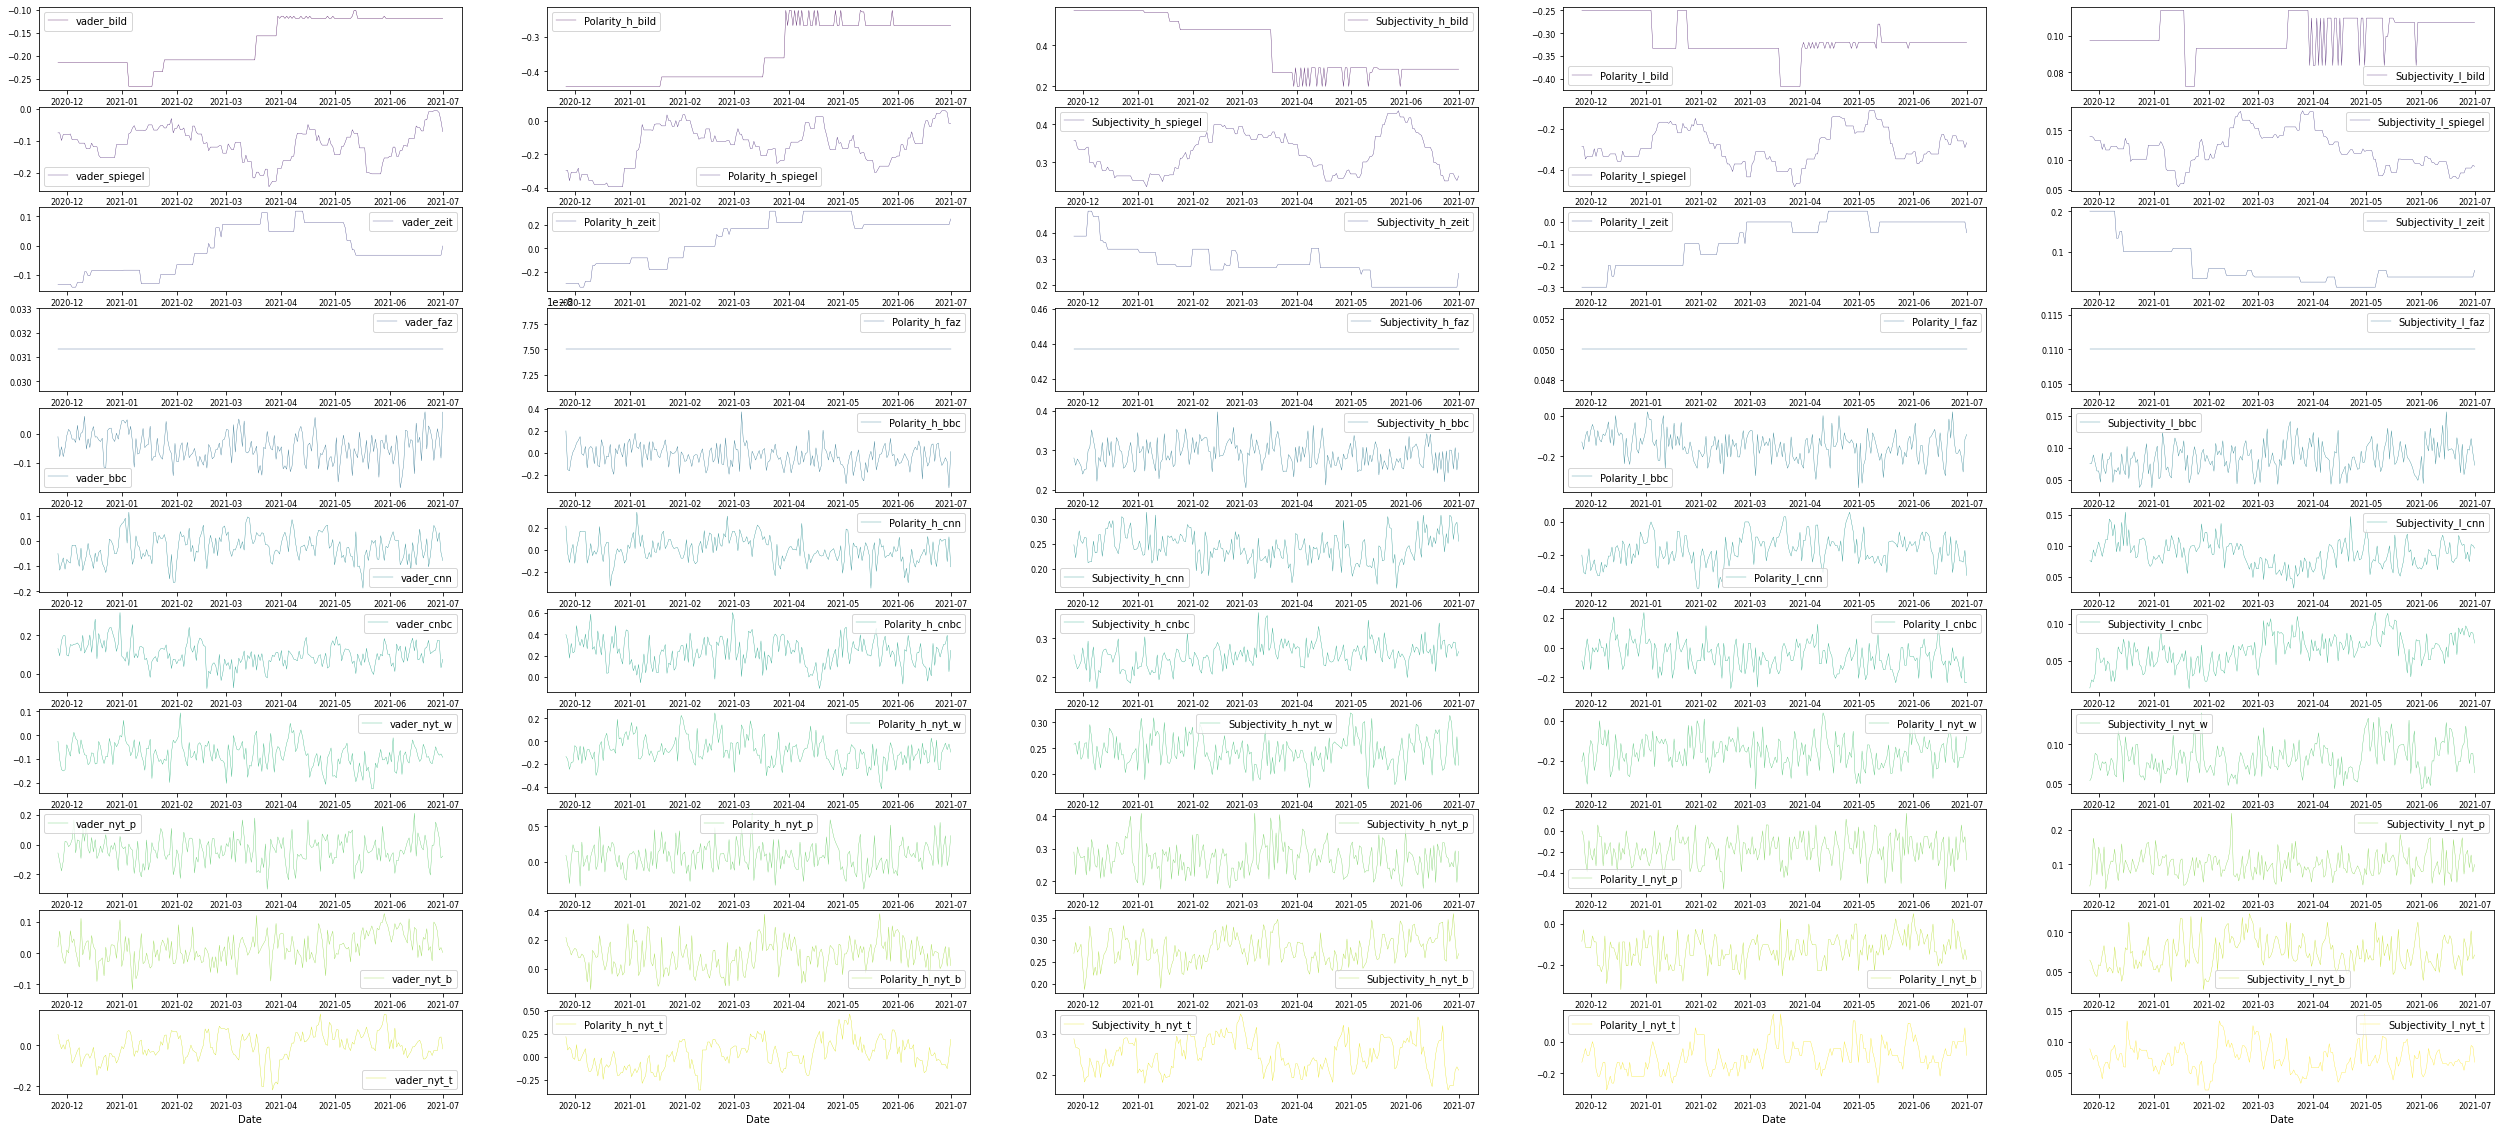

In [5]:
df.plot(subplots=True,
        figsize=(44,20),
          layout=(11, 5),
          sharex=False,
          sharey=False,
          colormap='viridis',
         fontsize=8,
         #legend=False,
         linewidth=0.35)
#plt.show()
plt.savefig('Sentiment Data.pdf')

From Left to Right:  Vader > Polarity_h > Subjectivity_h > Polarity_l > Subjectivity_l_
From Top to Bottom:  Bild > Spiegel > Zeit > FAZ > BBC > CNN > CNBC > NYT_W > NYT_P > NYT_B > NYT_T

We can see FAZ didn't work out as planned -- obviously the website changed and I didn't realize it. Also Bild, Spiegel and Zeit don't have a lot of changes -- The reason: Those are the english Versions of german websites and most likely don't get the same amount of content.

## Include Market Data

Let's get some market Data! For germany the DAX, SPY, TECDAX, STOXX50, MDAX and SDAX are the most correlated indexes -- especially for retail traders.

In [6]:
data = yf.download("DAX", start="2020-11-20", end="2021-07-07") # DAX SPY ^TECDAX ^STOXX50E ^MDAXI ^SDAXI

[*********************100%***********************]  1 of 1 completed


Let's have a look at the market data with ```dtale```

In [7]:
#dtale.show(data, ignore_duplicate=True)

Now we calculate the daily returns, daily changes and log returns. We also calculate our daily STD and the volatility.

In [8]:
# calculate daily logarithmic return
data['Daily returns'] = data['Adj Close']/data['Adj Close'].shift()

data['Daily change'] = data['Adj Close'].pct_change()**2
data[['Daily change']] = StandardScaler().fit_transform(data[['Daily change']])

data['Log returns'] = np.log(data['Adj Close']/data['Adj Close'].shift())


# calculate daily standard deviation of returns
daily_std = data['Log returns'].std()

# annualized daily standard deviation

volatility = daily_std*252**.5


It's always important to check the distribution!

Text(0.5, 1.0, 'DAX volatility: 15.98%')

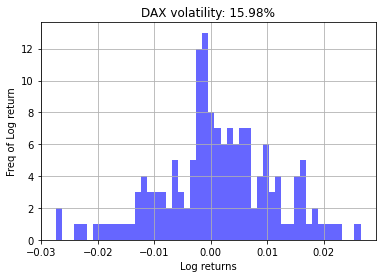

In [9]:
str_vol = str(round(volatility, 4)*100)

fig, ax = plt.subplots()
data['Log returns'].hist(ax=ax, bins=50, alpha=0.6, color='b')
ax.set_xlabel('Log returns')
ax.set_ylabel('Freq of Log return')
ax.set_title('DAX volatility: ' + str_vol + '%')

<AxesSubplot:xlabel='Date'>

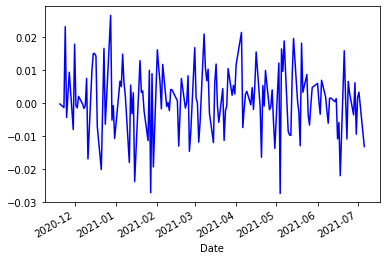

In [10]:
data['Log returns'].plot(color='b')

For our volatility metric we use [realized volatility](https://en.wikipedia.org/wiki/Realized_variance) which is the square root of realized variance. The key differences from the standard deviation of returns are:

- We use Log returns
- It's annualized
- In the case Variance Swaps, log returns are not demeaned

In [11]:
window = 5  # trading days in rolling window
days_per_year = 252  # trading days per year
ann_factor = days_per_year / window

# Var Swap (returns are not demeaned)
data['real_var'] = np.square(data['Log returns']).rolling(window).sum() * ann_factor
data['real_vol'] = np.sqrt(data['real_var'])

# Classical (returns are demeaned, dof=1)
data['classical_var'] = data['Log returns'].rolling(window).var() * ann_factor
data['classical_vol'] = np.sqrt(data['classical_var'])

We use a rolling window of 5 Trading Days, because thats roundabout the time news will be on the website.

Next we plot our variance and volatility

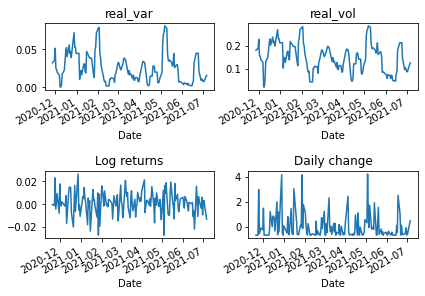

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=2)

fig.tight_layout()
data['real_var'].plot(ax=axes[0,0]); axes[0,0].set_title('real_var')

data['real_vol'].plot(ax=axes[0,1]); axes[0,1].set_title('real_vol')

data['Log returns'].plot(ax=axes[1,0]); axes[1,0].set_title('Log returns')

data['Daily change'].plot(ax=axes[1,1]); axes[1,1].set_title('Daily change')
plt.subplots_adjust(wspace=0.2, hspace=1.2)

plt.show()

## Merge Data

Now the most interesting part: combining the market data with our sentiment analysis!

In [13]:
data = pd.merge(df,data, how='inner', left_index=True, right_index=True)

Let's have a look at the correlations with ```dtale```

In [14]:
dtale.show(data, ignore_duplicate=True)

## Analyze for correlation and test robustness

Now we can ...

#### Next Steps:

- ~Import Data Set~

- ~Look for missing data points~

- ~Plot and If necessary adjust df by normalization etc~

- ~Import Stock Data for same Timeline~

- ~Align with same datetime format~

- ~Market Research: In which firms do (German) Retail Traders invest? 
Which Index should be our baseline? S&P? DAX?~

- Analyze Data for correlation: Daily Returns, Absolute Daily Returns, Log Returns, Variance, STD, Volatility

- De-trending data for stationary data set, Granger causality, Co-integration and OLS

# 4. Critique <a id="4"></a>

**Preliminary thoughts of critique:** 
- We started our data collection in the midst of one of the most controversial elections (and the markets didn't react as expectad throughout the pandemic)
- The articles didn't change daily for every news outlet - not a reliable leading indicator (maybe social media pages from news outlets are faster?)
- The articles didn't always focus on finance related subjects (maybe only the financial section next time?)
- No parsing for mentioned stocks
- No parsing for user interaction (but do *those* users even participate in financial markets?)

# Thank you for completing this Notebook!

<hr>
<h5>
<p> <center>  <font color='gray'> Jupyter Notebook by </font> Jonas Gottal </center></p>
</h5>